In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install warnings
#!pip uninstall graphviz
#!pip install dtreevizy[lightgbm]
#!pip install python-graphviz
!pip install xgboost
!pip install sklearn
!pip install shap
!pip install pymc3

ERROR: Could not find a version that satisfies the requirement warnings
ERROR: No matching distribution found for warnings
     |████████████████████████████████| 869 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 9.1 MB/s  eta 0:00:01
     |████████████████████████████████| 1.8 MB 11.7 MB/s eta 0:00:01     |███████████████████▌            | 1.1 MB 11.7 MB/s eta 0:00:01


     |████████████████████████████████| 4.7 MB 17.1 MB/s eta 0:00:01     |████████████████████▎           | 3.0 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 807 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 21.1 MB/s eta 0:00:01
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529946 sha256=ad1a118a393be612ee56fa5703904f50a3ce2f70522f39cfa2c33f35a01b5c96
  Stored in directory: /home/jovyan/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')
import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Question 1: Free shippings / Free returns
- Offering free shippings/returns is a great incentive to get more customers to place an order on your store while eliminating one of the last obstacles that could prevent people from completing their orders. On the other hand, free shipping eliminates the anticipation of the hassle that is paying for return shipping. By getting rid of both forms of friction, we can encourage more repeat purchases from your product-based business.
- As the result, it was expected that the traffic of visitors was more frequent and stable, plus, the customers were more attracted and more engaged to the products. One of the expected outcome is to gain a certain of loyal customers. In other words, we wanted to see the number of orders were regular eventhough the visit traffic was changed up/down a bit.
- I'll plot both visits and orders on the same chart and look for the trend which matches my assumption.


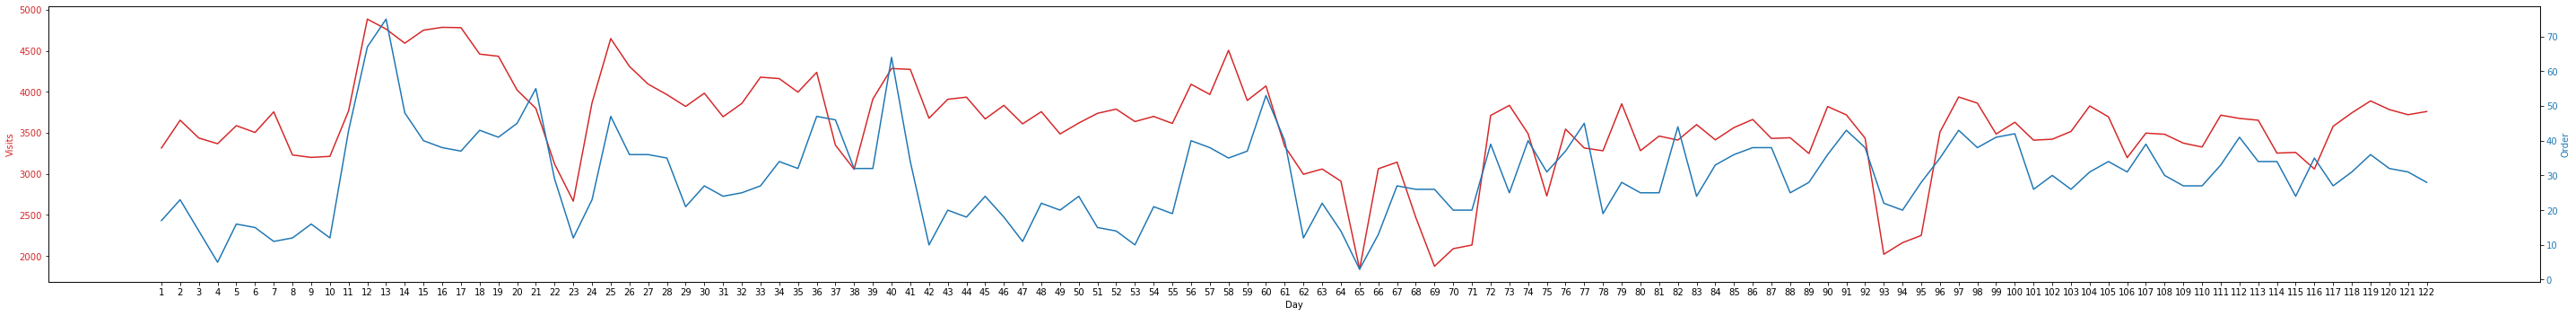

In [2]:
# load csv files into dataframe
data = pd.read_csv("../data/ex1_marketing_promo.csv")

fig, ax1 = plt.subplots(figsize=(40, 5))

color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('Visits', color=color)
ax1.plot(data.Day, data.visits, color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_xticks(data.Day)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Order', color=color)  # we already handled the x-label with ax1
ax2.plot( data.Day, data.orders, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(data.Day)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Observation
- With the above assumption, I belive that the promotion was lanched at 65th day since the number of visitors and orders were growing steadily. More importantly, The user engagement to the service was more regular by the fact that the orders wasn't fallen down the bottem as before regardless the loss of visits.
- Nex step is to validate my belief by computing the mean of 2 samples: visits/orders before 65th day and after 65th

In [10]:
groupa = data[data.Day <= 65]
print("average orders (A): ", np.mean(groupa.orders))
print("average visits (A): ", np.mean(groupa.visits))
print("order/visit: (A)", np.mean(groupa.orders/groupa.visits))

groupb = data[data.Day > 65]
print("average orders (B): ", np.mean(groupb.orders))
print("average visits (B): ", np.mean(groupb.visits))
print("order/visit: (B)", np.mean(groupb.orders/groupb.visits))

average orders (A):  28.861538461538462
average visits (A):  3806.846153846154
order/visit: (A) 0.007334045678189993
average orders (B):  31.31578947368421
average visits (B):  3346.6140350877195
order/visit: (B) 0.009434462827011965


## Observation
- The figure supports my assupmtion: the visit frquency in average before the promotion was slightly better than after the promotion. However, the number of orders were rising and the probability of making a purchase is 0.9% which was still better than before the free shipping campaign was lanched 0.7%

# Question 2: A/B test

## Load data csv file into dataframe

In [24]:
data = pd.read_csv("../data/ex2_ab_test.csv")

data

,Unnamed: 0,trials_A,successes_A,trials_B,successes_B
0,Country_1,8251,512,1084,89
1,Country_2,5604,353,257,17
2,Country_3,3252,120,5931,202
3,Country_4,4174,138,3758,131
4,Country_5,1918,53,3939,94
5,Country_6,3731,22,3412,24


## Data processing:
- Calculate the conversation rate of A and B for each country where the experiments were performed
- Rename first column to country

In [25]:
data = data.rename(columns={'Unnamed: 0': 'country'})
data['conversion_rate_A'] = np.round(data.successes_A/data.trials_A, 2)
data['conversion_rate_B'] = np.round(data.successes_B/data.trials_B, 2)
data

,country,trials_A,successes_A,trials_B,successes_B,conversion_rate_A,conversion_rate_B
0,Country_1,8251,512,1084,89,0.06,0.08
1,Country_2,5604,353,257,17,0.06,0.07
2,Country_3,3252,120,5931,202,0.04,0.03
3,Country_4,4174,138,3758,131,0.03,0.03
4,Country_5,1918,53,3939,94,0.03,0.02
5,Country_6,3731,22,3412,24,0.01,0.01


## The approach
- We will compare the two groups based on conversion rate metric such as which version generated a higher rate. The comparison of A/B test allows us to choose the better version of the website that would subsequently be shown to all users. Additionall, we also want to know how much better it is as well as how much risky the loss is.
- To obtain my wanted outcome, We are gonna use Bayesian approach which allows us to calculate the posterior success rates for the experiment A and B, compare them directly, and calculate the probability that one is better than the other. More than that, we also wanna quantify how much better it is, and even estimate the expected loss in case we make a wrong decision and deploy the worse website version.
- The result from this notebook is verified on this website: https://peakconversion.com/2012/02/ab-split-test-graphical-calculator


### Simulate Beta Posterior
- We've seen that for binomial data, a beta prior would generate a beta posterior according to these formulas which you have already seen before. This allows us to simply sample the posterior draws from the appropriate beta distribution.
- The following fuctions is about implementing this idea.

In [8]:
def simulate_beta_posterior(num_trials, num_success, n_posterior_draws=1000000, prior_a=1, prior_b=1):
    return np.random.beta(num_success + prior_a, num_trials - num_success + prior_b, n_posterior_draws

### Compare posteriors and expected loss
- We can subtract one from the other to calculate the posterior difference between conversion rate between A and B. It's very likely to be positive, which corresponds to B being better. To get the explicit probability of B being better than A, we can create a Boolean array that is True when B is better and False otherwise, and compute its mean.
- We can also estimate the expected loss resulting from accidentally deploying a worse version. First, we slice the difference between the two posteriors to take only the rare cases where A is better. This is our loss. Then, we take the average to get the expected loss.

In [17]:
def compare_beta_posterior(a_posterior, b_posterior, hpi_prob):
    diff = b_posterior - a_posterior
    # Calculate and print 99% credible interval of posterior difference
    interval = pm.hdi(diff, hpi_prob)
    #print(interval)
    #calculating the lift
    lift = np.mean(diff)
    #print("lift", lift)
    # Calculate and print probability of clothes ad being better
    better_prob = np.mean(diff > 0)
    #print("The probability of B better A: ", better_prob)
    # Slice diff to take only cases where it is negative
    b_a_loss = [i for i in diff if i < 0]
    # Compute and print expected loss
    expected_loss = np.mean(b_a_loss)
    #print(expected_loss)
    return diff, lift, better_prob, expected_loss

def plot_diff_posteriors(beta_a, beta_b):
    diff = beta_b - beta_a
    sns.kdeplot(diff,  label="diff", shade=True, color='red')
    sns.kdeplot(beta_a, shade=True, label='Beta posterior of A', color='green')
    sns.kdeplot(beta_b, shade=True, label='Beta posterior of B', color='yellow')
    plt.show()


## Overall converstion rate between A and B

In [5]:

n_trials_a = data.trials_A.sum()
n_successes_a = data.successes_A.sum()
n_trials_b = data.trials_B.sum()
n_successes_b = data.successes_B.sum()

conversion_rate_a = np.round(n_successes_a / n_trials_a, 2)
conversion_rate_b = np.round(n_successes_b / n_trials_b, 2)

print(conversion_rate_a)
print(conversion_rate_b)


0.04
0.03


We have just discovered that B is likely to have a lower conversion rate than A. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between A and B conversion rate. Then, we will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, we will compute the percentage of cases where this difference is positive as well as the loss where the difference is negative.

In [14]:
beta_a = simulate_beta_posterior(n_trials_a, n_successes_a)
beta_b = simulate_beta_posterior(n_trials_b, n_successes_b)
print("Beta posterior of A: ", beta_a)
print("Beta posterior of B: ", beta_b)
diff, lift, better_prob, loss = compare_beta_posterior(beta_a, beta_b, hpi_prob=0.99)
#print("The difference between A & B: ",lift)
print("The probability of B better A: ", better_prob)
print("The loss: ", loss)

Beta posterior of A:  [0.04323945 0.04447138 0.04288276 ... 0.04594082 0.04508442 0.04703036]
Beta posterior of B:  [0.02901149 0.02992397 0.03220128 ... 0.02985537 0.02913986 0.02941232]
The probability of B better A:  0.0
The loss:  -0.014166189560276939


## Observation: 
- It is highly 99% certain that B is not better A and the loss is about  1,4% if we replace the version A by the version B.

## Plot the posterior difference between A & B

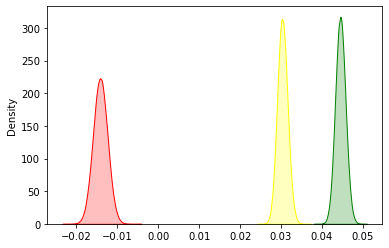

In [18]:
plot_diff_posteriors(beta_a, beta_b)

## Personalization test segmented by country
Just like with any other kind of marketing, some treatments are particularly effective on users of a specific engagement level. It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. Not all customers are alike.

In [34]:
def ab_segmentation():
    
    countries = data.country
    for cnt in countries:
        print(cnt)
        n_trials_a = data[data.country == cnt].trials_A.sum()
        n_successes_a = data[data.country == cnt].successes_A.sum()
        n_trials_b = data[data.country == cnt].trials_B.sum()
        n_successes_b = data[data.country == cnt].successes_B.sum()

        beta_a = simulate_beta_posterior(n_trials_a, n_successes_a)
        beta_b = simulate_beta_posterior(n_trials_b, n_successes_b)
        print("Beta posterior of A: ", beta_a)
        print("Beta posterior of B: ", beta_b)
        diff, lift, better_prob, loss = compare_beta_posterior(beta_a, beta_b, hpi_prob=0.99)
        #print("The difference between A & B: ",lift)
        print("The probability of B better A: ", better_prob)
        print("The loss: ", loss)
        plot_diff_posteriors(beta_a, beta_b)
        print('\n')

        

Country_1
Beta posterior of A:  [0.05933653 0.0622549  0.06389153 ... 0.06169669 0.06024632 0.06293591]
Beta posterior of B:  [0.07360897 0.07441607 0.08209486 ... 0.09589871 0.09809742 0.08830148]
The probability of B better A:  0.993697
The loss:  -0.0024764310938434884


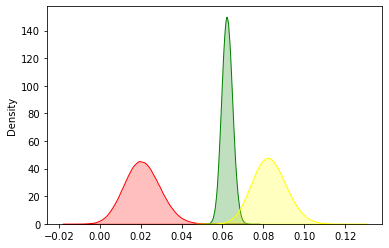



Country_2
Beta posterior of A:  [0.06272934 0.05668707 0.05719759 ... 0.06024147 0.06341178 0.06244759]
Beta posterior of B:  [0.04578957 0.08972238 0.080755   ... 0.07667273 0.07974696 0.08824978]
The probability of B better A:  0.632096
The loss:  -0.009684086940572491


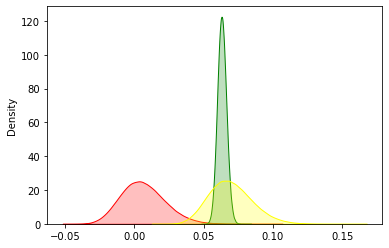



Country_3
Beta posterior of A:  [0.03722743 0.04043781 0.03660962 ... 0.03822869 0.03742752 0.04045993]
Beta posterior of B:  [0.03348351 0.03395927 0.03434552 ... 0.03673472 0.03795918 0.03343128]
The probability of B better A:  0.233483
The loss:  -0.004584288510465232


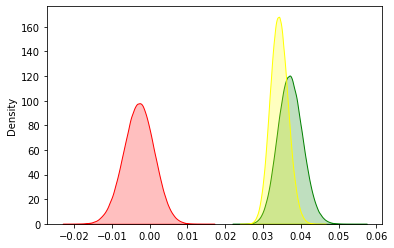



Country_4
Beta posterior of A:  [0.03481058 0.02925701 0.03614649 ... 0.03405574 0.0292848  0.02898097]
Beta posterior of B:  [0.03349282 0.03719365 0.0335598  ... 0.03802892 0.03369571 0.03334662]
The probability of B better A:  0.67161
The loss:  -0.0026741771905833735


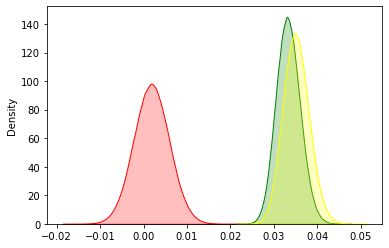



Country_5
Beta posterior of A:  [0.02479859 0.03347358 0.02657529 ... 0.02413609 0.03284159 0.02529308]
Beta posterior of B:  [0.02680666 0.02606617 0.02251841 ... 0.02385657 0.02842214 0.02629675]
The probability of B better A:  0.185969
The loss:  -0.005464354365541603


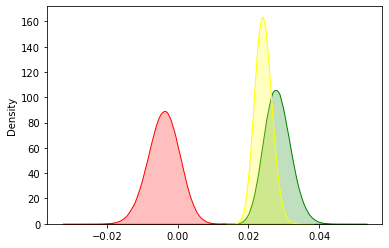



Country_6
Beta posterior of A:  [0.00540843 0.00608491 0.00480812 ... 0.00683328 0.00562347 0.00699181]
Beta posterior of B:  [0.00681725 0.00581599 0.00504066 ... 0.0057387  0.01027608 0.00602782]
The probability of B better A:  0.726501
The loss:  -0.001176719433848754


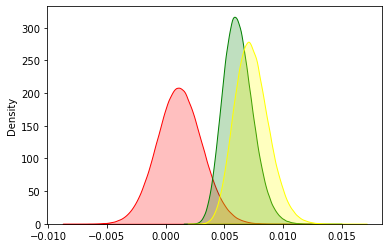

In [35]:
ab_segmentation()

# Question 3: Price prediction

In [5]:
data = pd.read_csv("../data/ex3_product_data.csv")
data.head()

,category,sub_category,brand,model,material,color,quality,flag,pop1,pop2,time_online,sold,price
0,2.0,21.0,63.0,NaN,8.0,4.0,2.0,1,6,64,10,1,2434.14
1,2.0,9.0,377.0,NaN,66.0,15.0,2.0,0,0,28,7,1,1833.54
2,2.0,21.0,499.0,NaN,66.0,15.0,2.0,0,2,42,5,1,2581.95
3,2.0,45.0,499.0,NaN,25.0,21.0,2.0,0,5,19,429,0,2048.04
4,2.0,42.0,541.0,NaN,8.0,24.0,2.0,0,5,55,96,1,789.64


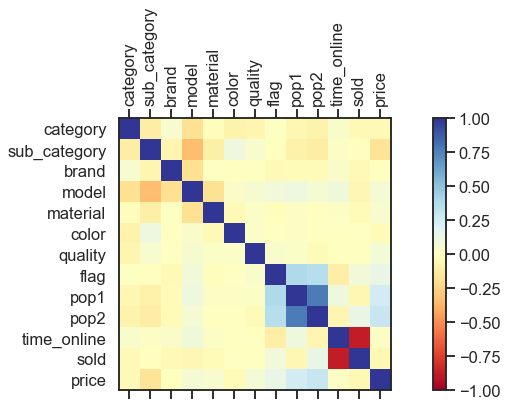

In [39]:
def correlation_matrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin = -1, vmax = 1, interpolation = 'none', cmap = 'RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 

correlation_matrix(data)

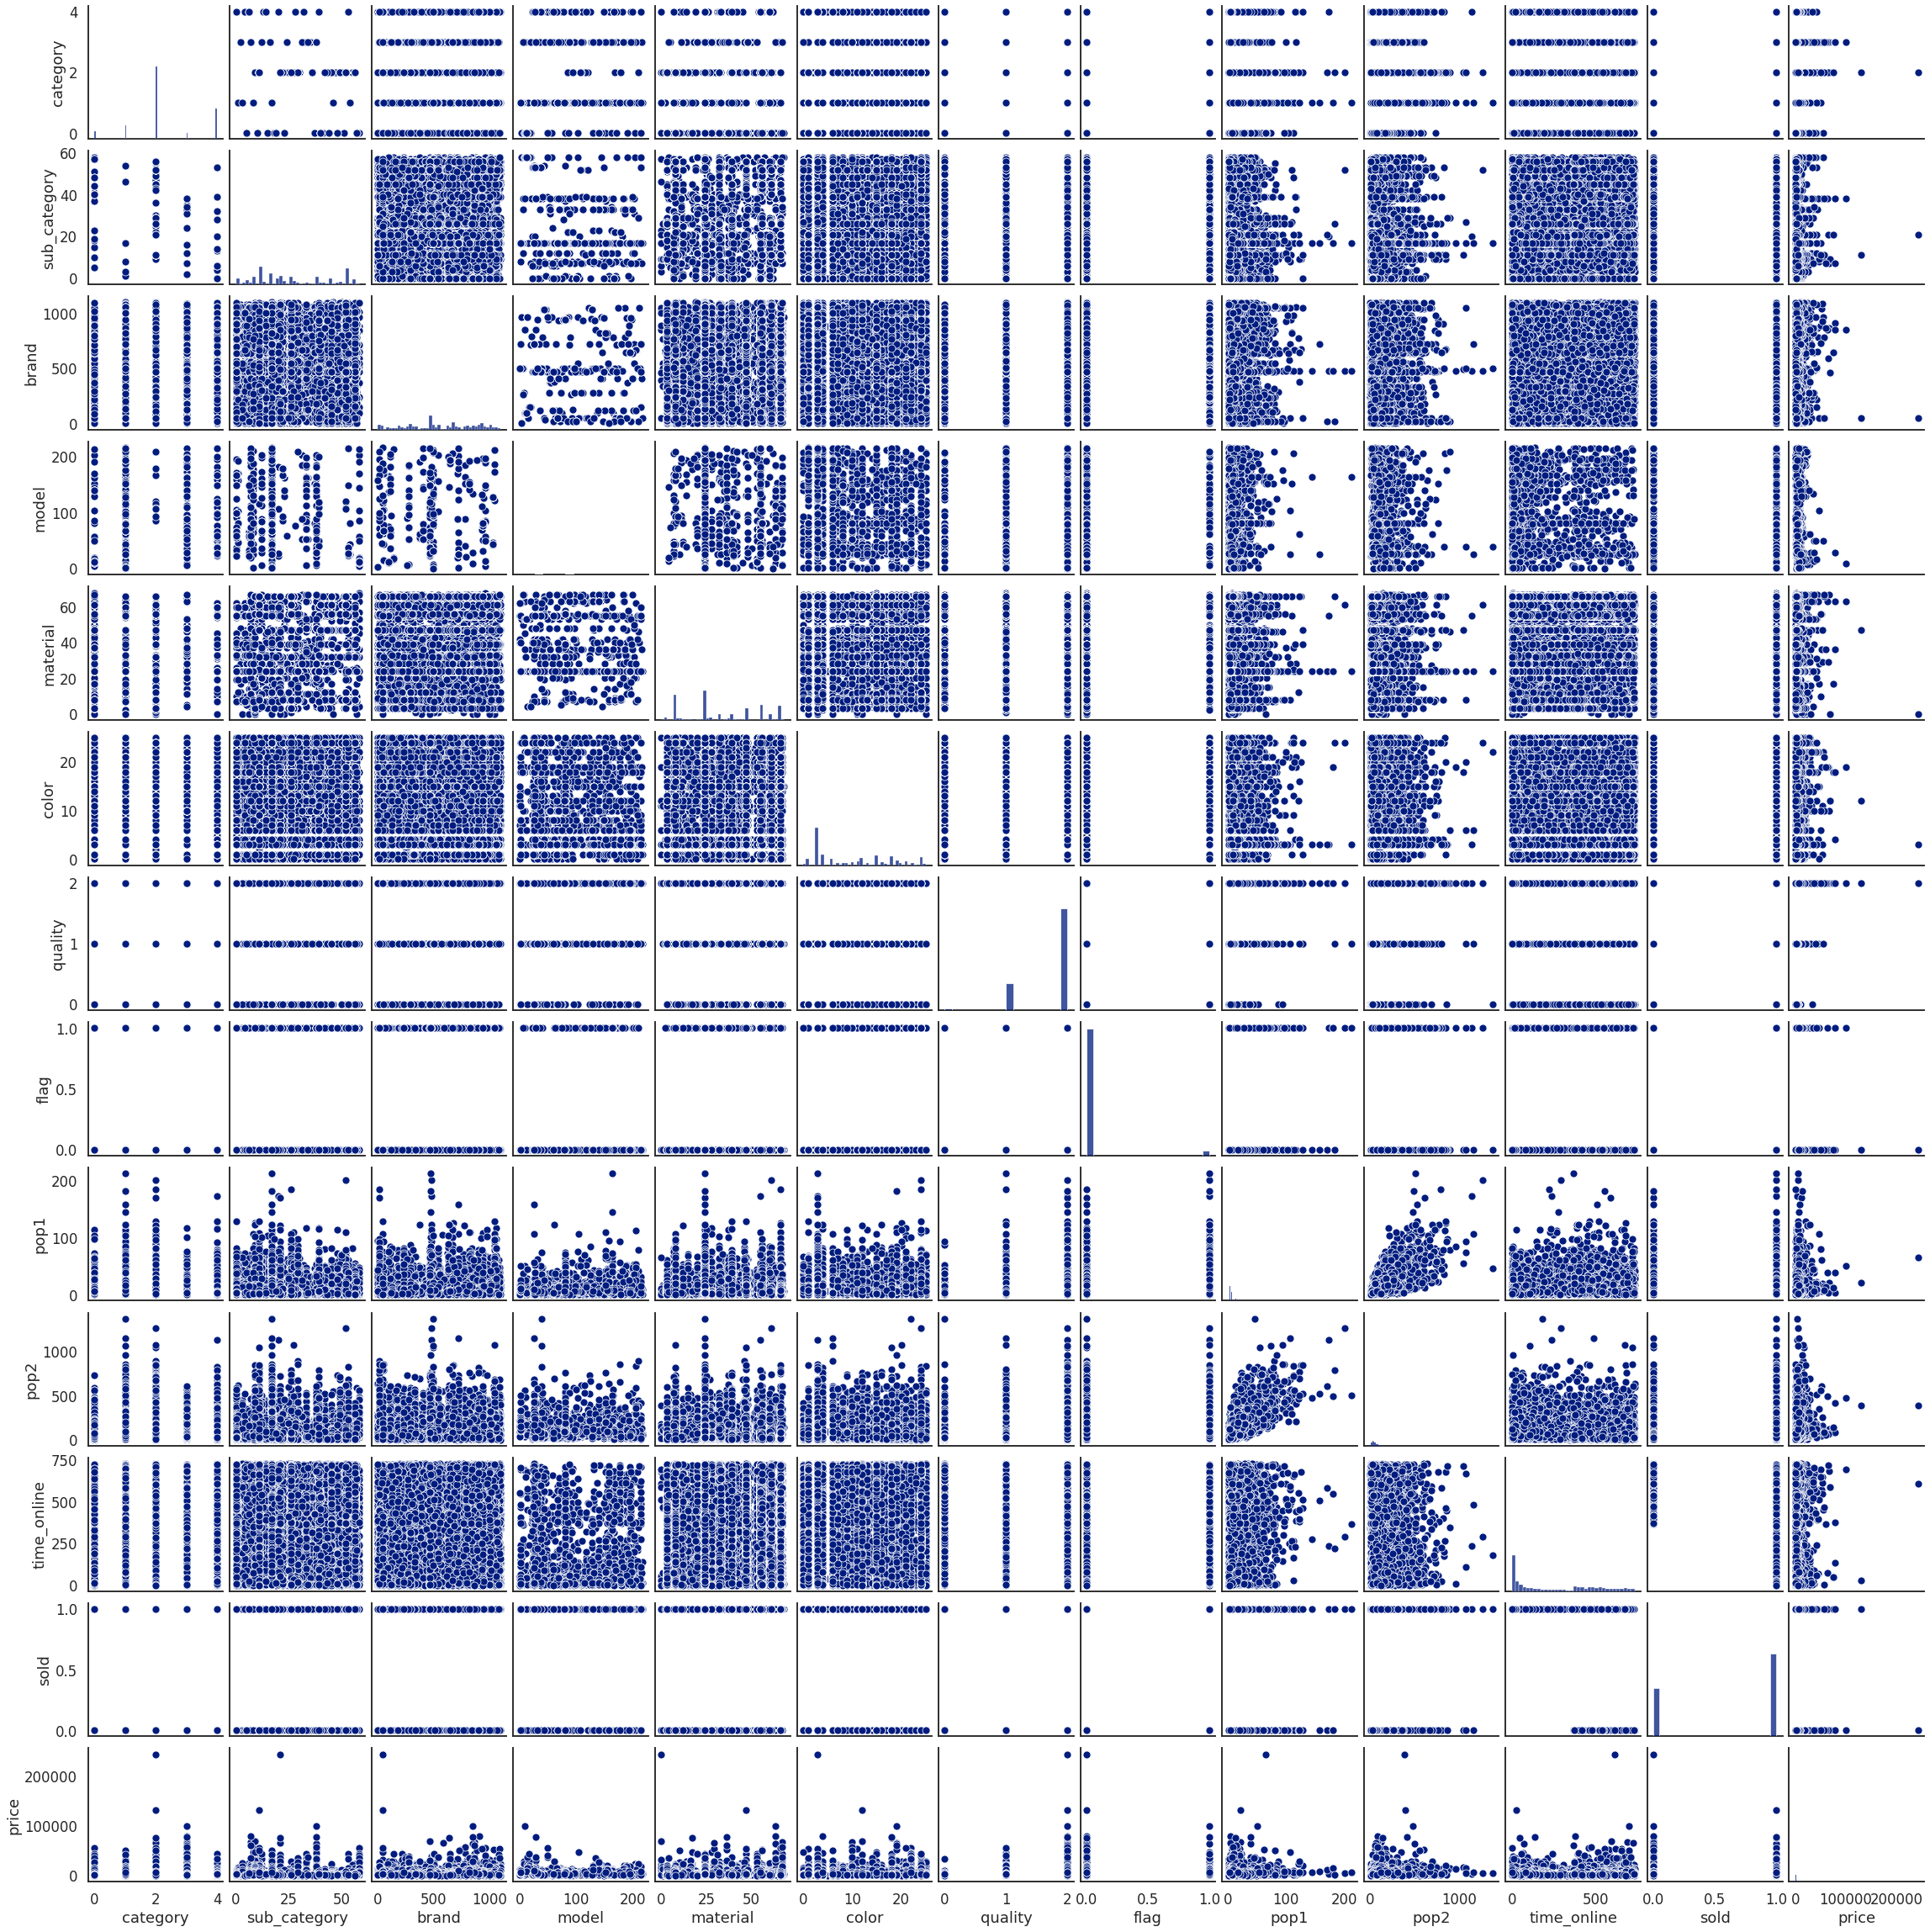

In [6]:
sns.pairplot(data, diag_kind="hist")

## Observation
- Pop 1 vs Pop 2: They are correlated
- Price vs Category: Price of product of category 2 and 3 are higher than category 0, 1 and 4 plus there some outliners
- Price vs Quality: Product with a quality level 2 is the more expensive than the ones with quality 0 and 1. The product with quality 1 is cheapeast.

## Q1: Plot the distribution of the time to sell and fit an appropriate distribution

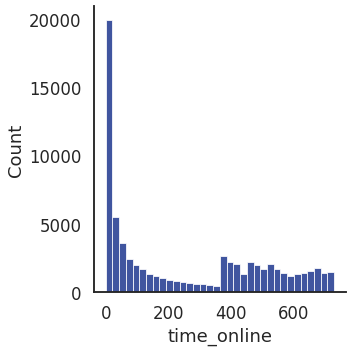

In [7]:
sns.displot(data = data, x="time_online")

- The density distribution of time_online is strongly left-skewed. The 0 value in the distribution probably means that many product were sold in a the same day when they were posted on the website. 
- Lets plot the relation between time_online and sold.

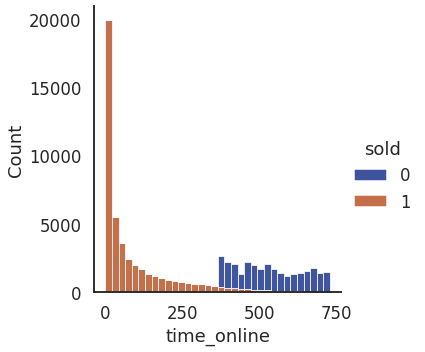

In [8]:
sns.displot(data = data, x="time_online", hue="sold", multiple="stack")

### Observation
- The more products were kept online, the last chance they were purchased by the customers.
- The product was usually sold less than 400 days after it was live. After that, it was unsold.
- It was possibly said that the website is highly recommend the new products and they are the first things the customers see.
- it could be drived into 2 proportions: time_online < 400 days and 400 days <= time_online <= the present (750 days)

In [12]:
data['cat_timeonline'] = data.time_online.apply(lambda time : 1 if time < 400 else 0)
data.head()

,category,sub_category,brand,model,material,color,quality,flag,pop1,pop2,time_online,sold,price,cat_timeonline
0,2.0,21.0,63.0,NaN,8.0,4.0,2.0,1,6,64,10,1,2434.14,1
1,2.0,9.0,377.0,NaN,66.0,15.0,2.0,0,0,28,7,1,1833.54,1
2,2.0,21.0,499.0,NaN,66.0,15.0,2.0,0,2,42,5,1,2581.95,1
3,2.0,45.0,499.0,NaN,25.0,21.0,2.0,0,5,19,429,0,2048.04,0
4,2.0,42.0,541.0,NaN,8.0,24.0,2.0,0,5,55,96,1,789.64,1


### Q2: What the estimated sell rate at 30 days per categories?
- Plot the sale rate of categories where  products were live in 30 days

Text(0, 0.5, 'Sale Rate')

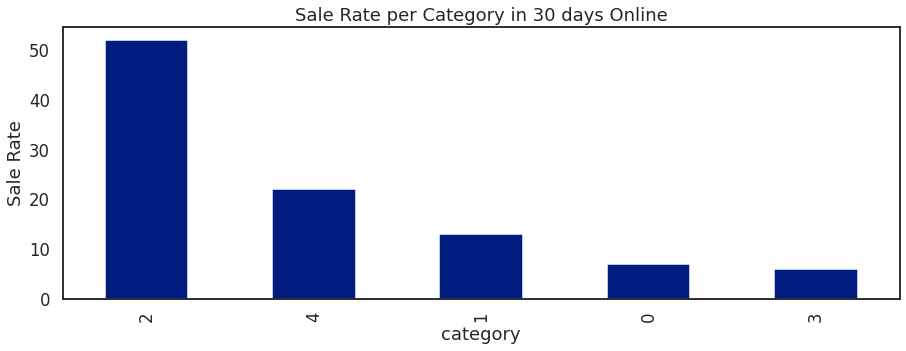

In [28]:
data.category = data.category.astype("int64")
data.category = pd.Categorical(data.category)
sale_in_30days = data[data.time_online <= 30]
(np.round(sale_in_30days.groupby('category')['sold'].sum().sort_values(ascending=False)/len(sale_in_30days), 2)*100).plot(kind='bar', figsize=(15, 5))
plt.title("Sale Rate per Category in 30 days Online")
plt.ylabel('Sale Rate')

We have 5 categories in total

## Q3: Top 5 most expensive expensive brand Ids

In [13]:
# Convert the brand to categorical
data.brand = data.brand.astype("int64")
data.brand = pd.Categorical(data.brand, ordered=True)
# 5 most expensive sold products
data.groupby('brand')['price'].mean().sort_values(ascending=False)[:5]

brand
642    75793.140
587    65894.170
747    51483.140
864    41915.725
929    34323.140
Name: price, dtype: float64

Text(0.5, 0, 'Average Price')

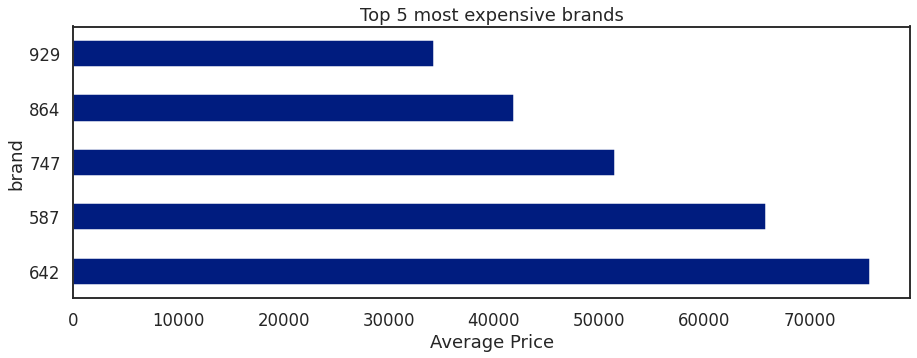

In [29]:
data.groupby('brand')['price'].mean().sort_values(ascending=False)[:5].plot(kind='barh', figsize=(15, 5))
plt.title('Top 5 most expensive brands')
plt.xlabel('Average Price')

### Q4: Estimate the sell price of an item? How would you then use this to recommend an acceptable price/price range to sellers

In [5]:
features = ['category', 'brand', 'material', 'quality','pop1', 'pop2', 'time_online', 'price' ]
sale_data = data[data.sold==1][features]
sale_data.head()

,category,brand,material,quality,pop1,pop2,time_online,price
0,2.0,63.0,8.0,2.0,6,64,10,2434.14
1,2.0,377.0,66.0,2.0,0,28,7,1833.54
2,2.0,499.0,66.0,2.0,2,42,5,2581.95
4,2.0,541.0,8.0,2.0,5,55,96,789.64
6,4.0,1000.0,24.0,2.0,4,30,16,1218.64


In [9]:
def to_categorical(column_names, data):
    for col in column_names:
        # if (not data[col].all().isna()):
        #data[col] = data[col].astype("int64")
        data[col] = pd.Categorical(data[col])

to_categorical(['category', 'brand', 'material', 'quality'], sale_data)    

In [10]:
sale_data_encoded = pd.get_dummies(sale_data)
sale_data_encoded.head()

,pop1,pop2,time_online,price,category_0.0,category_1.0,category_2.0,category_3.0,category_4.0,brand_0.0,...,material_62.0,material_63.0,material_64.0,material_65.0,material_66.0,material_67.0,material_68.0,quality_0.0,quality_1.0,quality_2.0
0,6,64,10,2434.14,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,28,7,1833.54,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,42,5,2581.95,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,55,96,789.64,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,4,30,16,1218.64,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
sns.pairplot(sale_data_encoded, diag_kind="hist")

In [ ]:
sns.relplot(data=sale_data_encoded, x='pop1', y='price')